<a href="https://colab.research.google.com/gist/ruchibahl18/9cca61b704a2c9816304226689f223eb/llama3-2_11_b_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.9 MB/s eta 0:00:00


In [2]:
# Import packages
from groq import Groq
import base64
from IPython.display import Image
import os


In [4]:
from google.colab import userdata
os.environ["GROQ_API_KEY"] = userdata.get('groq')

In [20]:

client = Groq()
llama_3_2_Vision_11B = 'llama-3.2-11b-vision-preview'
llama32_model = 'llama-3.2-3b-preview'

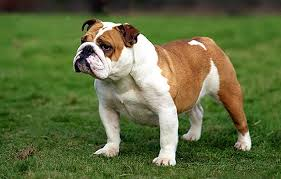

In [6]:
# Load and display image
image_path = 'images/dog.jpg'
Image(image_path)

In [13]:
# Define image encoding function
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

base64_image = encode_image(image_path)

In [18]:
# Define image to text function
def image_to_text(client, model, base64_image, prompt):
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image}",
                        },
                    },
                ],
            }
        ],
        model=model
    )

    return chat_completion.choices[0].message.content

prompt = "Describe this image"
image_to_text(client, llama_3_2_Vision_11B, base64_image, prompt)

"The image depicts a serene scene of a brown and white bulldog standing on a lush grassy field. The dog, positioned centrally in the frame, faces to the left, its head turned slightly towards the camera. Its short, muscular body is covered in a thick coat of brown and white fur, complemented by dark brown ears and a black nose. The dog's ears are folded back, adding to its endearing expression.\n\nThe grassy field, which occupies most of the image, is a vibrant green color and appears to be well-maintained. The background is blurred, but it appears to be a natural setting, possibly a park or a field, with some bushes or trees visible in the distance. The overall atmosphere of the image is one of tranquility and contentment, as the dog seems to be enjoying the fresh air and peaceful surroundings."

In [21]:
# Define short story generation function
def short_story_generation(client, image_description):
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": "You are a children's book author. Write a short story about the scene depicted in this image or images.",
            },
            {
                "role": "user",
                "content": image_description,
            }
        ],
        model=llama32_model
    )

    return chat_completion.choices[0].message.content

prompt = '''
Describe this image in detail, including the appearance of the dog(s) and any notable actions or behaviors.
'''
image_description = image_to_text(client, llama_3_2_Vision_11B, base64_image, prompt)

print(short_story_generation(client, image_description))

**"Bramble's Sunny Day"**

The sun was shining brightly in the sky, casting a warm glow over the lush green field where Bramble stood proudly. His wrinkled ears flapped gently in the breeze, as he tilted his head to the left, gazing directly at the photographer. Bramble's thick black nose twitched with excitement, and his large brown eyes sparkled with curiosity.

As the photographer snapped away, Bramble's rounded, smooth back coat glistened in the sunlight, displaying its intricate patterns of tan and brown, with dark brown spots scattered across his chest. His white coat was clean and radiant, while his tan-colored coat seemed to glow with a warm, golden light.

Bramble's paws, with their light pink pads, were tucked gently beneath him, as if ready to spring into action at a moment's notice. His heavy body, weighted evenly on his four legs, exuded a sense of confidence and contentment. His tail, cropped short and curved up, wagged ever so slightly, betraying Bramble's enthusiasm for

In [22]:
base64_image1 = encode_image('images/pointer.jpg')
base64_image2 = encode_image('images/dog.jpg')

image_description1 = image_to_text(client, llama_3_2_Vision_11B, base64_image1, prompt)
image_description2 = image_to_text(client, llama_3_2_Vision_11B, base64_image2, prompt)

combined_image_description = image_description1 + '\n\n' + image_description2

print(short_story_generation(client, combined_image_description))

**"The Hunt Begins"**

As the sun shone brightly in the sky, Jasper, the Pointer, and his loyal companion, Roman, the Vizsla, sat poised in the lush green field. Their noses twitched in unison, lifted high to catch even the faintest scent. Their tails stood at attention, their ears flapping gently in the breeze.

Jasper, the seasoned hunter, stood straight and tall, his long legs coiled, ready to spring into action. Roman, the energetic younger sibling, sat lower, his paws tucked under his body, a look of excitement and anticipation on his face.

The two dogs were on high alert, their senses heightened as they scanned the surroundings. The trees swayed in the wind, their leaves rustling softly, while the grass beneath them was a vibrant green. A few clumps of straw-stained brown grass poked through the lush growth, a testament to Jasper's years of hunting experience.

The air was filled with the sweet scent of blooming wildflowers and the earthy aroma of damp soil. The clouds drifted l